In [1]:
# Importing libraries necessary for assignment

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def plot_monthly_sales(df):
    '''Defined function to plot line chart on sum profit every year
    '''
    plt.figure(figsize=(12, 5))        
    plt.plot(df.groupby('Order Month')['Profit'].sum(), label='Profit', marker='o', linestyle='-')       
    plt.xlabel('Order Month')
    plt.ylabel('Profit ($)')
    plt.xlim(0,14)
    plt.title(' Profit Analysis')
    plt.legend()
    # Function to show plot graph
    plt.show()
    return

In [16]:
def plot_sales_category(df):
    '''Defined function to plot pie chart of different category to compare sales
    '''
    plt.figure(figsize=(9, 8))
    plt.pie(df['Sales'], labels=df['Category'], autopct='%1.1f%%', startangle=120)
    plt.title('Sales of Different Category')
    plt.axis('Equal')
    # Function to show plot graph
    plt.show()
    return

In [4]:
def plot_correlation(df_1, method):
    """
    Generate a heatmap to visualize the correlation between profit, sales, discounts, order year and order month
    
    are some of columns names from data set
    """
    fig, ax = plt.subplots(dpi=144)
    # Mask is used here to prevent the repetition of value
    mask = np.triu(np.ones_like(df_1.corr()))
    sns.heatmap(df_1.corr(method=method), ax=ax, vmin=-1, vmax=1, cmap='RdBu', annot=True, mask=mask)
    plt.title(method.capitalize())
    # Function to show plot heatmap
    plt.show()
    return

In [5]:
# Using read_csv() function from pandas to read .csv file. This data set has been downloaded from kaggle and some encoding parameters have been set to run data set. 
df = pd.read_csv('/Users/partht/Downloads/Sample - Superstore.csv', encoding='latin1',index_col = 'Row ID')

# Method returns a specified (5) number of rows, string from the top
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
# Preprocessing Order Date and Ship Date column  

# convert order date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# extract month and year from order date
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year
df['Order Day of Week'] = df['Order Date'].dt.dayofweek

# Method returns a specified (5) number of rows, string from the top
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day of Week
Row ID,,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016,1
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016,1
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016,6
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015,6
5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015,6


In [7]:
# Created variable containing   necessary for Skewness , Kurtosis , Correlation matrix and Heatmap   
df_1 = df[['Sales' ,'Quantity', 'Discount','Profit', 'Order Month', 'Order Year']]

In [8]:
# Describing data to understand information of data set such as mean, stanadrd deviation, min and max value. Median values i.e 50% can be found in index column

df.describe()

,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day of Week
count,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896,7.809686,2015.722233,3.206324
min,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,1.000000,2014.000000,0.000000
25%,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750,5.000000,2015.000000,1.000000
50%,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500,9.000000,2016.000000,4.000000
75%,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000,11.000000,2017.000000,5.000000
max,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000,12.000000,2017.000000,6.000000
std,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108,3.284654,1.123555,2.122925


In [9]:
#Skewness of Data necessary to detect outlier in data set.
df_1.skew() 

Sales          12.972752
Quantity        1.278545
Discount        1.684295
Profit          7.561432
Order Month    -0.429693
Order Year     -0.282823
dtype: float64

In [10]:
#Kurtosis of Data necessary to understand  how the data clusters in the tails or peaks of a frequency distribution.
df_1.kurtosis()

Sales          305.311753
Quantity         1.991889
Discount         2.409546
Profit         397.188515
Order Month     -0.991328
Order Year      -1.307565
dtype: float64

In [11]:
# This corr() method finds the correlation of each column in a DataFrame.
df_1.corr()

,Sales,Quantity,Discount,Profit,Order Month,Order Year
Sales,1.000000,0.200795,-0.028190,0.479064,-0.000625,-0.009679
Quantity,0.200795,1.000000,0.008623,0.066253,0.023355,-0.005810
Discount,-0.028190,0.008623,1.000000,-0.219487,-0.004935,-0.002662
Profit,0.479064,0.066253,-0.219487,1.000000,-0.000502,0.004670
Order Month,-0.000625,0.023355,-0.004935,-0.000502,1.000000,-0.020183
Order Year,-0.009679,-0.005810,-0.002662,0.004670,-0.020183,1.000000


In [12]:
# Created variable using groupby function to sum sales on the basis of their category for pie chart.
category_sales = df.groupby('Category')['Sales'].sum().reset_index()

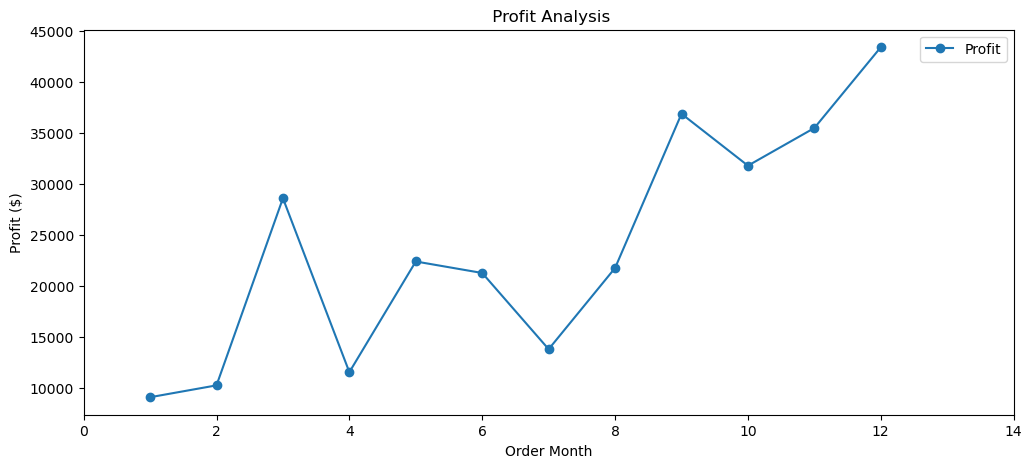

In [13]:
# Plotting Relational graph, line graph

plot_monthly_sales(df)

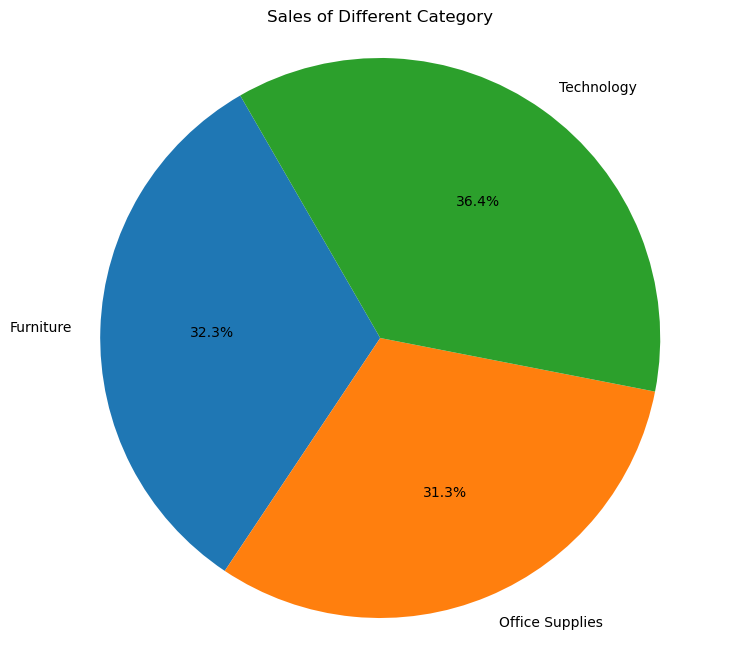

In [17]:
# Plotting Categorical graph , Pie chart

plot_sales_category(category_sales)

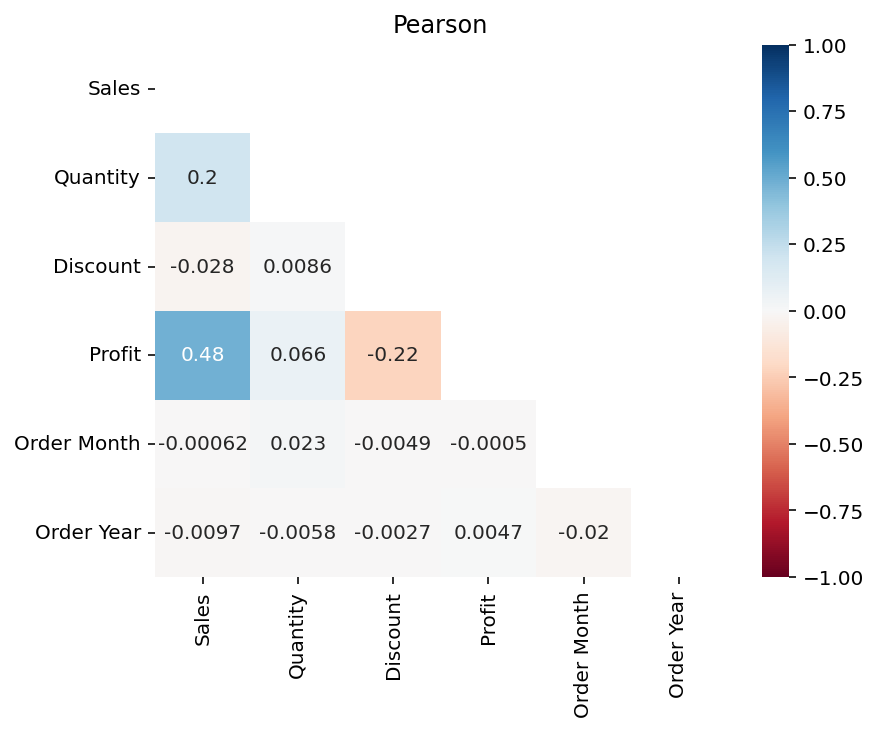

In [15]:
# Plotting Statistical graph, Heatmap

plot_correlation(df_1,'pearson')